## Running MobileNetV3 Locally Via PyTorch Weight File

See https://docs.google.com/document/d/1KtrBzb7UgxfEsj7FIIxAIF9_ZcgOLF_LZcjmdI3SghE/edit?usp=sharing for more details on running this

### Package Imports

In [1]:
import torch
from torchvision import models, transforms
from PIL import Image
import matplotlib.pyplot as plt
import json
import os

### Loading the Model

In [2]:
# Step 1: Load the pretrained MobileNetV3 model
model_path = "mobilenet_v3.pth"
model = None
if os.path.exists(model_path):
    print(f"Loading model from {model_path}")
    model = models.mobilenet_v3_large()  # Use mobilenet_v3_large for a larger model
    model.load_state_dict(torch.load(model_path))  # Load model from file
else:
    print(f"Model file not found. Downloading pretrained MobileNetV3.")
    model = models.mobilenet_v3_large(pretrained=True)  # Automatically downloads pretrained model
    torch.save(model.state_dict(), model_path)

model.eval()  # Set the model to evaluation mode

Model file not found. Downloading pretrained MobileNetV3.


/Users/fardinhaque/Downloads/Coding_Projects/DamageDoctor/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Users/fardinhaque/Downloads/Coding_Projects/DamageDoctor/venv/lib/python3.12/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=MobileNet_V3_Large_Weights.IMAGENET1K_V1`. You can also use `weights=MobileNet_V3_Large_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


MobileNetV3(
  (features): Sequential(
    (0): Conv2dNormActivation(
      (0): Conv2d(3, 16, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
      (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
      (2): Hardswish()
    )
    (1): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=16, bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
        )
        (1): Conv2dNormActivation(
          (0): Conv2d(16, 16, kernel_size=(1, 1), stride=(1, 1), bias=False)
          (1): BatchNorm2d(16, eps=0.001, momentum=0.01, affine=True, track_running_stats=True)
        )
      )
    )
    (2): InvertedResidual(
      (block): Sequential(
        (0): Conv2dNormActivation(
          (0): Conv2d(16, 64, kernel_size=(1, 1), stride=(1, 1), bi

### Load in Test Images

TODO: allow directory to be put in and select random images from there

In [14]:
# Step 2: Load and preprocess the image
image_path = "../images/20058.jpg"  # Replace with the path to your image
image = Image.open(image_path)

### Load and Classify

Predicted class: promontory


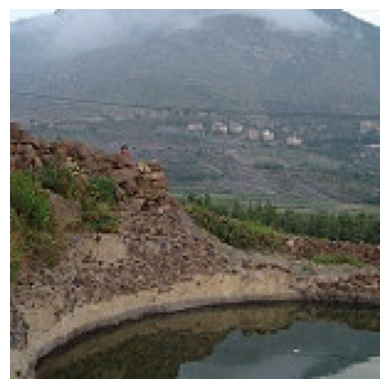

In [15]:
# Preprocessing to match the input requirements of MobileNetV3
preprocess = transforms.Compose([
    transforms.Resize(256),  # Resize image to 256px
    transforms.CenterCrop(224),  # Crop to 224x224px
    transforms.ToTensor(),  # Convert the image to a tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize
])

input_tensor = preprocess(image)
input_batch = input_tensor.unsqueeze(0)  # Add a batch dimension (1 image)

# Step 3: Pass the image through the model
with torch.no_grad():  # Disable gradient computation for inference
    output = model(input_batch)

# Step 4: Get the predicted class index
_, predicted_class = torch.max(output, 1)  # Get the index of the highest score

# Step 5: Load ImageNet class labels from a local file
local_class_idx_path = "imagenet_class_index.json"  # Replace with the actual file path

# Open the local JSON file and load its contents
with open(local_class_idx_path, 'r') as f:
    class_idx = json.load(f)

# Step 6: Map predicted class index to the class name
predicted_class_name = class_idx[str(predicted_class.item())][1]

# Step 7: Output the predicted class name
print(f"Predicted class: {predicted_class_name}")

# Step 8: Show the image
plt.imshow(image)
plt.axis('off')  # Hide axes
plt.show()